In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms
import torchvision
import os
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import torchvision.utils as tutils
import imageio
import pickle
import copy
from PIL import Image
import h5py 
from torch.utils.data import Dataset, DataLoader
from matplotlib.pyplot import imshow
import pandas as pd

/home/bhushan/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

In [3]:
# Loading Real images
realImageDir = './data/real-Cropped/'
realNoisySHcsv = './data/sh_real/RealImage_Celeb_000_SH.csv'
realNoisySH = pd.read_csv(realNoisySHcsv, sep = ',', header = None)

In [33]:
# Load real images
imgDim = 64
batch_size = 1
transform = transforms.Compose([
        transforms.Resize(imgDim),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

def dimChange(a):
    return a.permute(0, 1, 3, 2)

rImgTransform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(dimChange),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
dataset = datasets.ImageFolder(realImageDir, transform)
real_image_data_loader = torch.utils.data.DataLoader(dataset,batch_size=batch_size, shuffle=False)

torch.Size([3, 64, 64])


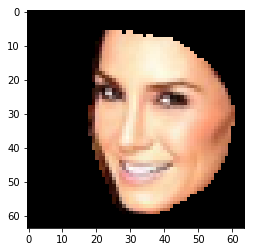

In [5]:
dreal = next(iter(real_image_data_loader))
print dreal[0][0].shape
show(denorm(dreal[0][0]))

In [6]:
# Create data and SH vectors
for data in real_image_data_loader:
    


IndentationError: expected an indented block (<ipython-input-6-1c74aa23e7df>, line 3)

In [63]:
# Test matlab generated H5 file
hf = h5py.File('../../SIRFS/data_1.h5', 'r')
print hf.keys()
syn1 = hf['/Image']
#label = hf['SH']
print syn1.shape
realImage = torch.utils.data.DataLoader(syn1, batch_size= 3, shuffle = True)

torch.Size([3, 3, 64, 64])


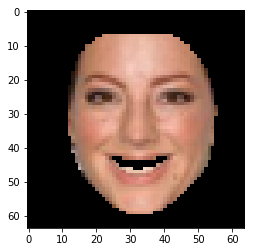

In [74]:
dreal = next(iter(realImage))
print dreal.shape
show(dreal[1])

In [21]:
d = dreal.permute(0, 1, 3, 2)
a = torch.rand(1,2,3,4)
print(a.transpose(0,3).transpose(1,2).size())
print(a.permute(3,2,1,0).size())

torch.Size([4, 3, 2, 1])
torch.Size([4, 3, 2, 1])


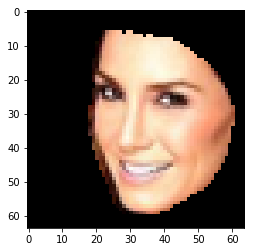

In [23]:
d.shape
show(d[0])

In [181]:
max(dreal[0][0][0])


0.0

In [89]:
dreal[0].shape

torch.Size([1, 3, 64, 64])

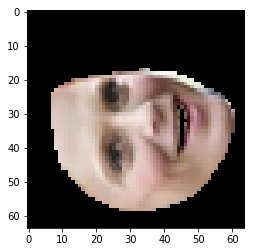

In [224]:
dreal = next(iter(realImage))
show(dreal[0])

In [136]:
syn2 = syn1

(5, 3, 64, 64)
(5, 3, 64, 64)


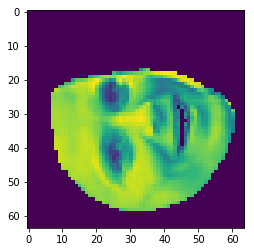

In [228]:
print syn1.shape
#syn2 = np.moveaxis(syn1, 1, 3)
#syn1 = np.moveaxis(syn1, 1, 2)
#syn1 = np.moveaxis(syn1, 2, 3)
print syn1.shape
imshow(syn1[0][0])